anvil up link

In [1]:
import anvil.server

anvil.server.connect("H5ATVVLXUAC5K67CFYV32Q2O-LCCLRZLILFNGFPLF")


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Classification Vehicule arbre tree

In [2]:

import pandas  as pandas
df = pandas.read_excel (r'C:\Users\amin\Desktop\worksop talet\Nouveau dossier\TOS_DI-Win32-20200219_1130-V7.3.1\workspace\vehiculenonSinstrer.xls')


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Voiture=df

In [5]:
Voiture=Voiture.replace('0',0)
Voiture=Voiture.replace('ESSENCE',1)
Voiture=Voiture.replace('GASOIL',2)
Voiture=Voiture.replace('ESS-GAZ GPL',3)
Voiture=Voiture.replace('ELECTRICITE',4)

In [6]:
Voiture=Voiture.drop(columns=['Vehicule_id', 'Marque', 'UsageVehicule'])

In [7]:
y= Voiture['sinister']
X=Voiture.drop(columns=['sinister'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2)# random_state=some_number pour garantir que votre split sera toujours le même

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,15)}

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [15]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [16]:
final_model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=8)

In [17]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [18]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.8526384474230863
le test_score= 0.8532191129612499


In [19]:

import pandas  as pandas
marque = pandas.read_excel (r'C:\Users\amin\Desktop\Final Data\marque.xlsx')


In [20]:
usage = pandas.read_excel (r'C:\Users\amin\Desktop\Final Data\usage.xlsx')

In [21]:
usage['Usage'].unique()

array(['Privé et professionnel',
       'Agricole1 véhicule dont le PTC < 3500 kg',
       'Agricole 2 véhicule dont le PTC > 3500 kg',
       'Agricole Tracteur et Moissonneuse Batteuse.',
       'Utilitaire 1 véhicule dont le PTC < 3500 kg (y compris usage voirie)',
       'Utilitaire 2 véhicule dont le PTC > 3500 kg (y compris voirie)',
       'Transport public de marchandise (avec matière dangereuse et inflammable)',
       'Transport public de voyageurs',
       'Transport privé de personnes (personnel / enfants /membre d’association)',
       'Taxi', 'Auto-Ecole', 'Louage', 'Transport Rural',
       'Agences de Voyage et Hôtels', 'Location', 'Engin de Chantiers',
       'autres usages (Ambulance / Corbillard / RC Garagiste / RC Trajet etc)'],
      dtype=object)

In [22]:
def compu(v):
     for i in range(0, 18):
        if usage['Usage'][i]==v:
            m=usage['Code'][i]
            print(m)
       
            return m 
       
            

In [23]:
def comp(a):
     for i in range(0, 1771):
        if marque['Marque'][i]==a:
            m=marque['Code'][i]
            return m 
        

In [24]:
@anvil.server.callable
def eval(PuissanceFiscale,Energie,Ptac,DateMiseEnCirculation,CodeMarque,CodeUsage):
    if Energie=="ESSENCE":
        e=1
    if Energie=="GASOIL":
        e=2
    if Energie=="ESS-GAZ GPL":
        e=3
    if Energie=="ELECTRICITE":
        e=4
    
    m=comp(CodeMarque)
    u=compu(CodeUsage)  
    print(m)
    print(u)
      
    predictionvoiture=[PuissanceFiscale,e,Ptac,DateMiseEnCirculation,m,u]
    features = np.array(predictionvoiture)
    predictionvoiture=features.reshape(1,-1)
    if final_model.predict(predictionvoiture)[0]>0:
        return 'this car is classified as a risk carrier'
    else:
        return 'this car is not risk carrier'


Feature: 0, Score: 0.19279
Feature: 1, Score: 0.03311
Feature: 2, Score: 0.00409
Feature: 3, Score: 0.00676
Feature: 4, Score: 0.34508
Feature: 5, Score: 0.41817


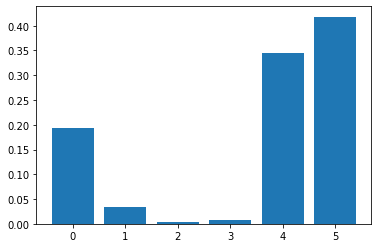

In [25]:
importance = final_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([X for X in range(len(importance))], importance)
plt.show()


In [26]:
predictionvoiture=[4,1,5,2001,107,29]
features = np.array(predictionvoiture)
predictionvoiture=features.reshape(1,-1)


In [27]:
# final_model.predict(predictionvoiture)
final_model.predict(predictionvoiture)[0]

1

In [28]:
X

,PuissanceFiscale,Energie,Ptac,DateMiseEnCirculation,CodeMarque,CodeUsage
0,4,1,5,2009,107,1
1,4,1,2,2010,30,1
2,4,1,6,2018,30,1
3,4,1,2,2014,30,1
4,7,2,6,2016,12,5
...,...,...,...,...,...,...
1037754,17,2,9,2018,376,2
1037755,10,2,7,2011,376,2
1037756,13,2,1,2010,338,2
1037757,5,1,9,2017,29,1


Profiling assurer

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
df1 = pd.read_excel (r'C:\Users\amin\Downloads\a.xlsx')

In [31]:
df1=df1.drop(columns=['AssureId', 'CodePostal', 'gouvernorat','nb sinistre'])

In [32]:
df1=df1.replace('Non',0)
df1=df1.replace('oui',1)

In [33]:
#Séparer les variables explicatives X/Classe y
X =  df1.drop(['Sinistrer'], axis=1)
y = df1['Sinistrer']
#Diviser les données (80% Apprentissage et 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X

,Age,ClasseBonnusMalus,sexe
0,19,2,0
1,69,2,1
2,70,5,0
3,71,3,1
4,44,8,1
...,...,...,...
1048570,50,4,1
1048571,44,4,1
1048572,25,1,1
1048573,22,3,1


In [36]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
model = XGBClassifier()
modelAssure=model.fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [39]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.96%


In [40]:
@anvil.server.callable
def evala(age,ClasseBonnusMalus,sexe):
    v=int(ClasseBonnusMalus)
    if sexe=="Male":
        e=0
    if sexe=="Female":
        e=1
    if v >4:
        v=v-3
        
    predictionassurer=[age,v,e]
    features = np.array(predictionassurer)
    predictionassurer=features.reshape(1,-1)
    if modelAssure.predict(predictionassurer)[0]>0:
        return 'this client is classified as a risk carrier'
    else:
        return 'this client does not carry any risk'

Feature: 0, Score: 0.01862
Feature: 1, Score: 0.95786
Feature: 2, Score: 0.02352


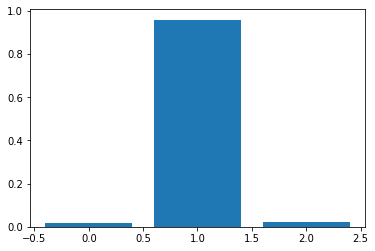

In [41]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

predicition Nb sinistre dans le temps

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [1]:
df_cga_prediction = pd.read_excel (r'C:\Users\amin\Downloads\amine.xlsx',parse_dates = ['Mois'], index_col =0)
df_cga_prediction=df_cga_prediction.drop(columns=['Ann_e', 'Temperature', 'precipitation','WindVitesse'])

NameError: name 'pd' is not defined

In [44]:
df2=df_cga_prediction
df2.columns

Index(['Nombre_de_sinistre', 'Colonne1'], dtype='object')

In [45]:
df2=df2.drop(['Colonne1'],axis=1)

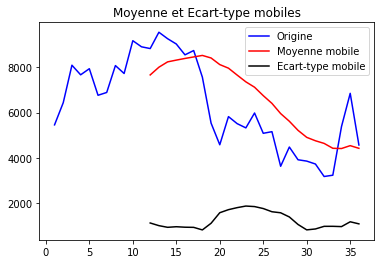

In [46]:
rolling_mean = df2.rolling(window = 12).mean()
rolling_std = df2.rolling(window = 12).std()
plt.plot(df2, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [47]:
def get_stationarity(timeseries):
    
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    result = adfuller(timeseries['Nombre_de_sinistre'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

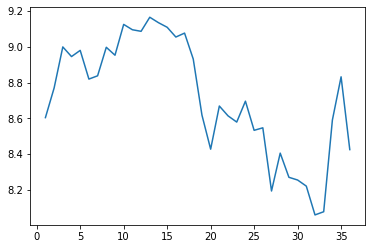

In [48]:
df_log = np.log(df2)
plt.plot(df_log)

In [49]:
rolling_meana = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log +rolling_meana
df_log_minus_mean.dropna(inplace=True)

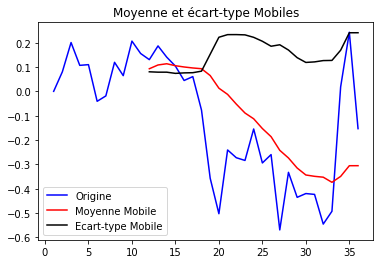

Statistiques ADF : -2.0597788837531006
p-value : 0.2609920858814282
Valeurs Critiques :
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [50]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


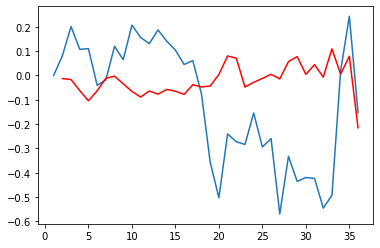

In [51]:
modelArima = ARIMA(df_log, order=(7,1,2))
results = modelArima.fit(disp=-2)
plt.plot(df_log_exp_decay)
plt.plot(results.fittedvalues, color='red')

C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


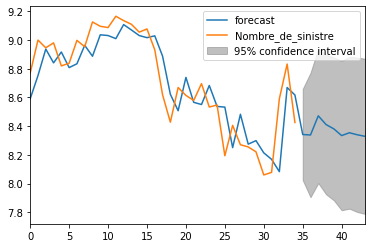

In [52]:
fig = results.plot_predict(1,44)

C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

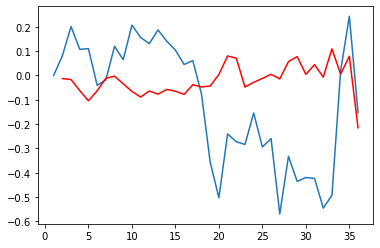

In [53]:
modelArima2 = ARIMA(df2, order=(7,1,2))
results2 = modelArima2.fit(disp=-2)
plt.plot(df_log_exp_decay)
plt.plot(results.fittedvalues, color='red')

In [54]:
from statistics import mean
np.exp(results.predict(1,39)+mean(qq))[38]

C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


NameError: name 'qq' is not defined

In [55]:
@anvil.server.callable
def v(date,mois):
    dam=str(date)
    mamp=str(mois)
    if date==2017:
        e=mois
    elif date==2018:
        e=mois+12
    elif date==2019:
        e=mois+24
    else:
        Mois=int(mois)
        date=int(date)
        a=date-2017
        e=Mois+(a*12)
    
    rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
    df_log_exp_decay = df_log - rolling_mean_exp_decay
    df_log_exp_decay.dropna(inplace=True)
    rolling_mean_exp_decay
    
    if e<36:
        x1=str(round(np.exp(results.predict(1,e)+rolling_mean_exp_decay['Nombre_de_sinistre'])[e-1]) )
        return 'the expected number of is accidents  for the date '+mamp+'/'+dam +' is '+x1
                
       
    else :
        x2=str(round(np.exp(results.predict(1,e)+mean(rolling_mean_exp_decay['Nombre_de_sinistre']))[e-1]))
        return 'the expected number of is accidents  for the date '+mamp+'/'+dam +' is '+x2
    


regression lineaire


In [56]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')

In [57]:
#importation des données /chargement du fichier
import pandas  as pd
df_cga_prediction = pd.read_excel (r'C:\Users\amin\Downloads\amine.xlsx')
df3=df_cga_prediction
pd.set_option('display.max_columns',88)

In [58]:
from sklearn.model_selection import train_test_split

X=df_cga_prediction[[ 'Mois','Ann_e','precipitation','WindVitesse','Temperature']]  # Features
y=df_cga_prediction['Nombre_de_sinistre']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
@anvil.server.callable
def evalw(Mois,Ann_e,precipitation,WindVitesse,Temperature):
    Mois=int(Mois)
    Ann_e=int(Ann_e)
    a=Ann_e-2017
    m=Mois+(a*12)
    predictr=[m,Ann_e,precipitation,WindVitesse,Temperature]
    features = np.array(predictr)
    predictr=features.reshape(1,-1)
    print(m)
    print(a)
    x=str(round(g.predict(predictr)[0]))
    return 'the predicted number of Accident is '+x
  

In [60]:
def evaluate(model):
   
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred)
    mse=metrics.mean_squared_error(y_test, ypred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)
    print(model.__class__.__name__)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    
    sns.regplot(y_test,ypred)
    c = [i for i in range(1,len(y_test)+1,1)]
    plt.subplot(1,2,2)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,ypred, color="red",  linewidth=2.5, linestyle="-") 
    plt.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Test Set', fontsize=18)                           
    plt.ylabel('target', fontsize=16) 
    plt.show()

RandomForestRegressor
explained_variance:  0.2175
mean_squared_log_error:  0.0391
r2:  0.1711
MAE:  1026.5595
MSE:  1602030.3459
RMSE:  1265.7134


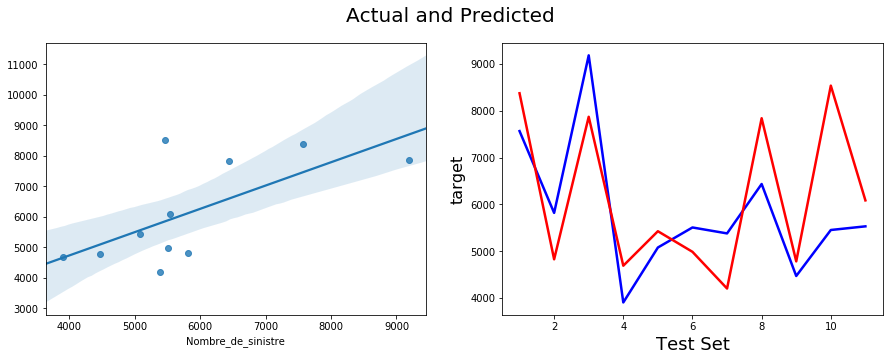

In [61]:
gridRandom=RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=200,random_state=0)
g=gridRandom.fit(X_train,y_train)

evaluate(gridRandom)
testRandom=gridRandom.score(X_test,y_test)
trainRandom=gridRandom.score(X_train,y_train)

In [62]:
o=evalw(1,2017,0.6,23,11)
o

1
0


'the predicted number of Accident is 8501.0'

In [63]:
X['Mois'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [64]:
X

,Mois,Ann_e,precipitation,WindVitesse,Temperature
0,1,2017,0.668683,23.240591,11.340726
1,2,2017,0.574702,21.293155,14.913690
2,3,2017,0.240860,22.474462,16.890457
3,4,2017,0.358056,22.419444,19.143750
4,5,2017,0.164247,22.633065,24.682796
5,6,2017,0.236250,20.297222,29.047917
6,7,2017,0.043145,22.419355,31.493952
7,8,2017,0.050403,19.340054,32.131720
8,9,2017,0.214861,21.227778,27.203472
9,10,2017,0.615054,18.736559,22.399866


In [65]:
m=[1,2017,0.66,23,11]
features = np.array(m)
t=features.reshape(1, -1)

detection fraude


In [66]:

import pandas  as pandas
df5 = pandas.read_excel (r'C:\Users\amin\Downloads\Assure_sin.xlsx')
a=df5
a=a.drop(columns=['AssureId', 'CodePostal', 'gouvernorat','tauxdesinstralite'])

In [67]:
df5=df5.replace('Non',0)
df5=df5.replace('oui',1)

In [68]:
a=df5.drop(columns=['AssureId', 'CodePostal', 'gouvernorat','Sinistrer'])

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
m = LocalOutlierFactor(n_neighbors=20, contamination=0.0009)


In [70]:
o=m.fit(a)
p=m.fit_predict(a)==-1

In [71]:
from anvil.tables import app_tables

In [72]:
@anvil.server.callable
def a():
        
        mp=df5[p]['AssureId']
        mp =np.array(mp)
        va=str(mp[1])
        for i in range(1,65):
            va=str(mp[i])+","+va
        return   va
    


In [73]:
@anvil.server.callable
def ad():
        
        mp=df5[p]['AssureId']
        mp =np.array(mp)
        q=len(mp)
        q=str(q)
        return  'the number of client that are suspected with fraud :'+ q
    


In [74]:
a()

'1559857,1298974,1073049,1050989,1034054,1033762,1008218,1007412,974653,685281,526706,526217,521588,494197,482005,449567,426938,387065,377199,375870,358704,352363,347515,333796,332021,331511,331125,331063,330474,330230,328924,326825,326255,322646,305165,286546,276444,274008,271533,269868,269584,261230,260222,255495,250087,249738,245142,235848,225126,215677,208638,207216,180582,179983,176492,161899,156608,129978,119900,97690,88829,88816,60593,29172,29172'

In [75]:
ad()

'the number of client that are suspected with fraud :65'

In [76]:
df5


,AssureId,CodePostal,Age,gouvernorat,ClasseBonnusMalus,nb sinistre,sexe,Sinistrer,tauxdesinstralite
0,5272,NaN,19,medenine,2,1,0,1,1
1,5274,NaN,69,el-kef,2,2,1,1,1
2,5303,NaN,70,zaghouan,5,2,0,1,1
3,5339,NaN,71,siliana,3,2,1,1,1
4,5354,NaN,44,sousse,8,1,1,1,1
...,...,...,...,...,...,...,...,...,...
136603,1740119,NaN,34,manouba,7,1,0,1,1
136604,1740314,NaN,19,sidi-bouzid,9,1,0,1,1
136605,1780492,NaN,48,benarous,11,1,0,1,1
136606,1783957,NaN,47,el-kef,10,1,1,1,1
